# pycbf - Basic example

This notebook roughly simulates channel data and beamforms it

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import ctypes as ct
from pycbf import CPUBeamformer
from scipy.signal import hilbert

/tmp/ipykernel_6948/1859768125.py:21: RuntimeWarning: invalid value encountered in divide
  alp = np.nan_to_num(np.arccos(np.abs(dfpproj/dfpmag)))


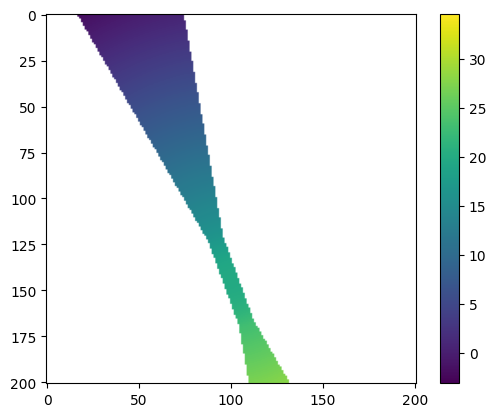

In [64]:
foc = 1E-3*np.array([0, 30])
c0  = 1540
ala = np.radians(10)
t0  = foc[1] * (2 - np.cos(ala))/c0
dof = 10E-3/2
als = np.radians(20)
n = np.array([np.sin(als),np.cos(als)])

Px, Pz = np.meshgrid(np.linspace(-20,20,201), np.linspace(1,41,201), indexing='ij')
P = 1E-3*np.array([Px.flatten(), Pz.flatten()])

dfp = P - foc[:,None]
dfpmag = np.linalg.norm(dfp, axis=0)
dfpproj = n @ dfp

taus = np.sign(dfpproj) * dfpmag/c0
dofinc = np.abs(dfpproj) < dof
taus[dofinc] *= np.abs(dfpproj)[dofinc]/dof
taus += t0

alp = np.nan_to_num(np.arccos(np.abs(dfpproj/dfpmag)))
apods = alp <= ala
apods[dofinc] = np.sqrt(dfpmag[dofinc]**2 - dfpproj[dofinc]**2) <= dof*np.sin(ala)

plt.figure()
plt.imshow(1E6*taus.reshape(Px.shape).T, alpha=1.0*apods.reshape(Px.shape).T)
plt.colorbar()
plt.show()